In [34]:
import pandas as pd
import numpy as np
df = pd.read_pickle('tv_data_cleansing.pkl') 

In [2]:
!conda install -y -c anaconda nltk

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::mamba==1.4.2=py310h51d5547_0
  - conda-forge/linux-64::libmamba==1.4.2=hcea66bb_0
  - conda-forge/linux-64::libmambapy==1.4.2=py310h1428755_0
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.7.1


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install

In [35]:
df.drop(['original_name'], axis=1, inplace=True)
#convert overview to string
df['overview'] = df['overview'].astype('string')
#fill NaN of overview with 'UnKnown'
df['overview'].fillna('UnKnown', inplace=True)

/tmp/ipykernel_110/3015107302.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['overview'].fillna('UnKnown', inplace=True)


In [3]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [36]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.auto import tqdm
tqdm.pandas()
analyzer = SentimentIntensityAnalyzer()
df['overview_polarity'] = df['overview'].progress_apply(lambda x: analyzer.polarity_scores(x))

100%|██████████| 71403/71403 [00:25<00:00, 2801.77it/s]


In [37]:
# Change data structure
df = pd.concat(
    [df.drop(['overview_polarity'], axis=1), 
     df['overview_polarity'].apply(pd.Series)], axis=1)

# Create new variable with sentiment "neutral," "positive" and "negative"
df['overview_polarity'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')

In [38]:
#drop overview and rename overview_polarity to overview , then convert overview to category
df.drop('overview', axis=1, inplace=True)
df.rename(columns={'overview_polarity': 'overview'}, inplace=True)
df['overview'] = df['overview'].astype('category')

In [39]:
pd.set_option("display.max.columns", None)

In [40]:
df

,id,number_of_episodes,original_language,vote_count,vote_average,adult,first_air_date,last_air_date,homepage,popularity,type,status,languages,networks,spoken_languages,production_countries,episode_run_time,genres_Crime,genres_Drama,genres_Sci-Fi & Fantasy,genres_Mystery,genres_Action & Adventure,genres_Comedy,genres_Animation,genres_Western,genres_Family,genres_Kids,genres_Reality,genres_Documentary,genres_War & Politics,genres_Soap,genres_Romance,genres_History,genres_UnKnown,genres_Talk,genres_News,genres_Musical,origin_continent,number_of_seasons,neg,neu,pos,compound,overview
0,71446.0,41.0,es,17836.0,8.257,False,2017-05-02,2021-12-03,www.netflix.com,96.354,Scripted,Ended,es,Other,Español,Spain,70.0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Europe,10.0,0.085,0.915,0.000,-0.8020,negative
1,66732.0,34.0,en,16161.0,8.624,False,2016-07-15,2022-07-01,www.netflix.com,185.711,Scripted,Returning Series,en,Netflix,English,United States of America,0.0,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,North America,10.0,0.244,0.756,0.000,-0.6705,negative
2,63174.0,93.0,en,13870.0,8.486,False,2016-01-25,2021-09-10,www.netflix.com,416.668,Scripted,Ended,en,Other,English,United States of America,45.0,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,North America,10.0,0.306,0.616,0.078,-0.9387,negative
3,69050.0,137.0,en,13180.0,8.479,False,2017-01-26,2023-08-23,Other,143.750,Scripted,Ended,en,Other,English,United States of America,45.0,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,North America,10.0,0.151,0.701,0.148,0.2263,positive
4,93405.0,9.0,ko,13053.0,7.831,False,2021-09-17,2021-09-17,www.netflix.com,115.587,Scripted,Returning Series,"en, ko, ur",Netflix,"English, 한국어/조선말, اردو",South Korea,0.0,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Asia,10.0,0.056,0.637,0.307,0.7430,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71398,240293.0,32.0,Other,0.0,0.000,False,2023-11-20,2023-12-21,Other,3.710,Miniseries,Returning Series,hi,Other,हिन्दी,<NA>,0.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Asia,10.0,0.000,1.000,0.000,0.0000,neutral
71399,240693.0,8.0,de,0.0,0.000,False,2023-11-30,2023-11-30,Other,3.028,Scripted,Returning Series,de,Other,Deutsch,<NA>,0.0,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Europe,10.0,0.000,1.000,0.000,0.0000,neutral
71400,239099.0,1.0,zh,0.0,0.000,False,2023-03-03,2023-03-03,Other,1.400,Scripted,Returning Series,<NA>,Other,<NA>,<NA>,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,Asia,10.0,0.000,1.000,0.000,0.0000,neutral
71401,240696.0,1.0,Other,0.0,0.000,False,2023-11-30,2023-11-30,Other,1.895,Scripted,Returning Series,bn,Other,বাংলা,India,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Asia,10.0,0.249,0.688,0.063,-0.6705,negative


In [41]:
#convert all category type columns to numbers using LableEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'category':
        df[column] = le.fit_transform(df[column])

In [42]:
#drop neg neu pos compound
df.drop(['neg', 'neu', 'pos', 'compound'], axis=1, inplace=True)

In [43]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('&', 'and')

In [12]:
!pip install matplotlib

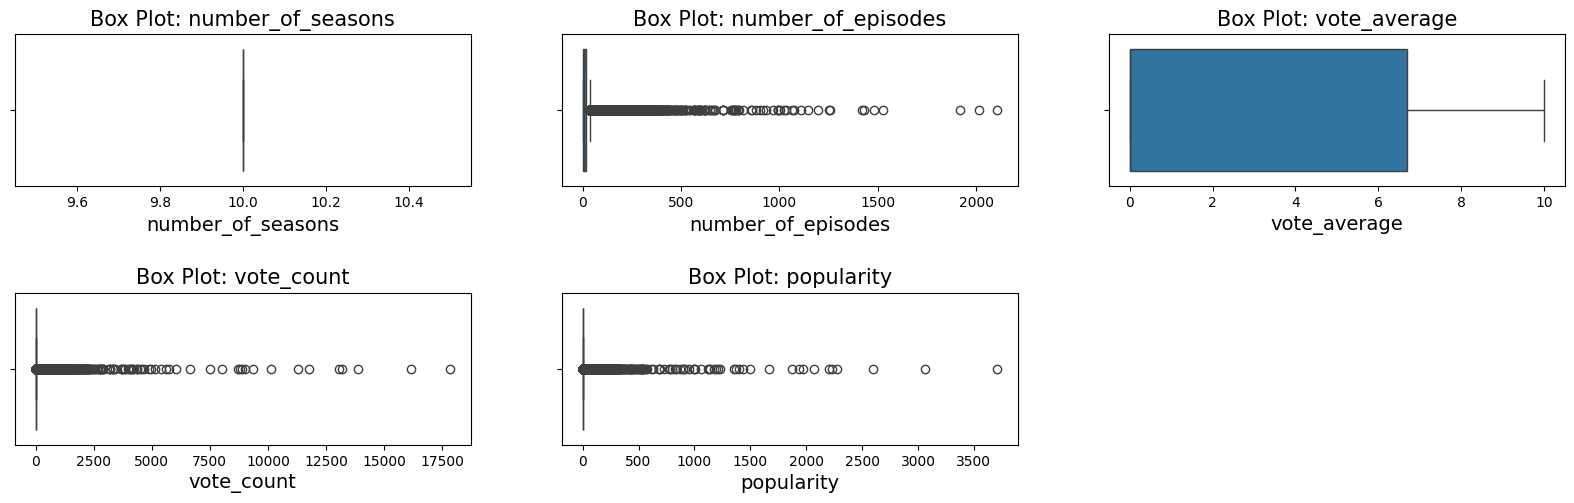

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
## Using box (Wiskers) plot 
plt.figure(figsize=(20,200))

def outliers_boxplot(df):
    for i, col in enumerate(df.columns):
        
            ax = plt.subplot(60, 3, i+1)
            sns.boxplot(data=df, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)

#create new Dataframe from the columns       number_of_seasons, number_of_episodes   ,vote_average
df_plot = df[['number_of_seasons', 'number_of_episodes', 'vote_average','vote_count','popularity']]

outliers_boxplot(df_plot)

In [45]:
df['first_air_month'] = pd.DatetimeIndex(df['first_air_date']).month
df = df.drop(['first_air_date'], axis=1)
df = df.drop(['last_air_date'], axis=1)

In [46]:
df.number_of_seasons = df.number_of_seasons.astype(int)

In [47]:
#fill NaN languages with Other
df['languages'].fillna('Other', inplace=True)
#split languages column , count the uniqe values and put in new column
df['languages_count'] = df['languages'].str.split(',').apply(len)
#drop languages and rename languages_count to languages
df.drop(['languages'], axis=1, inplace=True)
df.rename(columns={'languages_count': 'languages'}, inplace=True)

/tmp/ipykernel_110/2647510751.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['languages'].fillna('Other', inplace=True)


In [48]:
df['languages'].value_counts()

languages
1     68576
2      2254
3       409
4        96
5        36
6        18
7         6
8         6
10        1
12        1
Name: count, dtype: int64

In [49]:
#fill NaN spoken_languages with Other
df['spoken_languages'].fillna('Other', inplace=True)
#split spoken_languages column , count the uniqe values and put in new column
df['spoken_languages_count'] = df['spoken_languages'].str.split(',').apply(len)
#drop spoken_languages and rename spoken_languages_count to spoken_languages
df.drop(['spoken_languages'], axis=1, inplace=True)
df.rename(columns={'spoken_languages_count': 'spoken_languages'}, inplace=True)

/tmp/ipykernel_110/2251967752.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['spoken_languages'].fillna('Other', inplace=True)


In [50]:
df['spoken_languages'].value_counts()

spoken_languages
1     68878
2      2025
3       350
4        88
5        35
6        17
7         4
8         4
10        1
12        1
Name: count, dtype: int64

In [51]:
#fill NaN production_countries with Other
df['production_countries'].fillna('Other', inplace=True)
#split production_countries column , count the uniqe values and put in new column
df['production_countries_count'] = df['production_countries'].str.split(',').apply(len)
#drop production_countries and rename production_countries_count to production_countries
df.drop(['production_countries'], axis=1, inplace=True)
df.rename(columns={'production_countries_count': 'production_countries'}, inplace=True)

/tmp/ipykernel_110/2591051910.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['production_countries'].fillna('Other', inplace=True)


In [52]:
df['production_countries'].value_counts()

production_countries
1     69752
2      1306
3       220
4        71
5        21
6         8
7         6
10        4
9         4
8         3
12        3
22        1
18        1
16        1
13        1
17        1
Name: count, dtype: int64

In [53]:
df.drop(['id'], axis=1, inplace=True)

In [54]:
df

,number_of_episodes,original_language,vote_count,vote_average,adult,homepage,popularity,type,status,networks,episode_run_time,genres_Crime,genres_Drama,genres_Sci-Fi_and_Fantasy,genres_Mystery,genres_Action_and_Adventure,genres_Comedy,genres_Animation,genres_Western,genres_Family,genres_Kids,genres_Reality,genres_Documentary,genres_War_and_Politics,genres_Soap,genres_Romance,genres_History,genres_UnKnown,genres_Talk,genres_News,genres_Musical,origin_continent,number_of_seasons,overview,first_air_month,languages,spoken_languages,production_countries
0,41.0,4,17836.0,8.257,0,8,96.354,4,1,5,70.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,0,5,1,1,1
1,34.0,3,16161.0,8.624,0,8,185.711,4,5,4,0.0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,10,0,7,1,1,1
2,93.0,3,13870.0,8.486,0,8,416.668,4,1,5,45.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,10,0,1,1,1,1
3,137.0,3,13180.0,8.479,0,0,143.750,4,1,5,45.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,10,2,1,1,1,1
4,9.0,7,13053.0,7.831,0,8,115.587,4,5,4,0.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10,2,9,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71398,32.0,0,0.0,0.000,0,0,3.710,1,5,5,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10,1,11,1,1,1
71399,8.0,2,0.0,0.000,0,0,3.028,4,5,5,0.0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,1,11,1,1,1
71400,1.0,10,0.0,0.000,0,0,1.400,4,5,5,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,10,1,3,1,1,1
71401,1.0,0,0.0,0.000,0,0,1.895,4,5,5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10,0,11,1,1,1


In [55]:
df.to_csv('tv_feature_selection.csv')
df.to_pickle('tv_feature_selection.pkl')